## PCA and k-means Clustering 
Given the wine dataset. Apply dimensionality reduction and then k-means clustering 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter("ignore")

In [50]:
df = pd.read_csv('Dataset 1 - Wine quality-red.csv',delimiter = ';')

In [61]:
# create an extra quality column to transform the wine quality values [3,4,5,6,7,8] to low and high quality wine
df['quality_groups'] = np.where(df['quality'] <= 5 , 1, np.where(df['quality'] > 5, 2, 0))

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_groups
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


The columns of the wine dataset are the following: <br>

1 - fixed acidity (tartaric acid - g / dm^3) <br>
2 - volatile acidity (acetic acid - g / dm^3)<br>
   3 - citric acid (g / dm^3)<br>
   4 - residual sugar (g / dm^3)<br>
   5 - chlorides (sodium chloride - g / dm^3<br>
   6 - free sulfur dioxide (mg / dm^3)<br>
   7 - total sulfur dioxide (mg / dm^3)<br>
   8 - density (g / cm^3)<br>
   9 - pH<br>
   10 - sulphates (potassium sulphate - g / dm3)<br>
   11 - alcohol (% by volume)<br>
  
   Output variable (based on sensory data): <br>
   12 - quality (score between 0 and 10)<br>

## Buckingham Pi 
Purpose: dimensionality reduction, applies only to problems with physical quantities

In [7]:
# Pint is Python package to define, operate and manipulate physical quantities: the product of a numerical value and a
# unit of measurement. 
!pip install Pint
from pint import pi_theorem
from pint import formatter
from pint import UnitRegistry

# apply buckingham pi for dimensionality reduction (applies only to problems with physical quantities)
ureg = UnitRegistry()
variables={'FA': 'g / dm^3', 
           'VA': 'g / dm^3', 
           'CA': 'g / dm^3',
           'RS': 'g / dm^3',
           'C': 'g / dm^3',
           'FSD': 'mg / dm^3',
           'TSD': 'mg / dm^3',
           'Den': 'g / cm^3',
           'Sul': 'g / dm^3'
          }
ureg.pi_theorem(variables)
#result = ureg.pi_theorem(variables)
#print(formatter(result[2].items()))
#result

[{'FA': -1.0, 'VA': 1.0},
 {'FA': -1.0, 'CA': 1.0},
 {'FA': -1.0, 'RS': 1.0},
 {'FA': -1.0, 'C': 1.0},
 {'FA': -1.0, 'FSD': 1.0},
 {'FA': -1.0, 'TSD': 1.0},
 {'FA': -1.0, 'Den': 1.0},
 {'FA': -1.0, 'Sul': 1.0}]

## PCA 
Principal component analysis for dimensionality reduction  <br>
Each principal components its the eigenvalue(magnitude) and eigenvector(direction) <br>

1st step: Split data into variables and labels <br>
2nd step: Standardize the variables (remove the mean from the values and divide with the std)  <br>
3rd step: Find the principal components ( a ne array with the principal components is created, each column of the array represents a principal component)   <br>
4th step: Check the ratio of coverance of the total variance (For each principal component/column find the variance and divide with the total of the variances of all the principal components)  <br>
5th step: Keep the Principal Components with the highest coverance <br>

Now you reduce the dimensions of your dataset to the number of the principal components.  <br>
You can continue with clustering after applying PCA <br>

In [65]:
# split data table into data X and class labels y
# use for the PCA only the independant variables and not the labels
X = df.iloc[:,0:10].values # create numpy array with the independant variables
y = df.iloc[:,11].values  # create numpy array with label : quality 

In [ ]:
# Standardizing--> substracting the mean and dividing with the standard deviation 
from sklearn.preprocessing import StandardScaler
X_scaled= StandardScaler().fit_transform(X) # fit computes the x-x(mean)/std +transform sets the computed parameters on the dataset
print("after scaling minimum", X_scaled.min(axis=0) )

In [140]:
# Main core of PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3) # define desired number of PCA components
# fit to cpmpute the pca components and transform to apply PCA components on the standardized data--> 
# creates the PCA components for each row
X_pca=pca.fit_transform(X_scaled) 

In [141]:
# contribution in % of each principal component to the total variance
pca.explained_variance_ratio_

array([0.27974768, 0.18365795, 0.12483876])

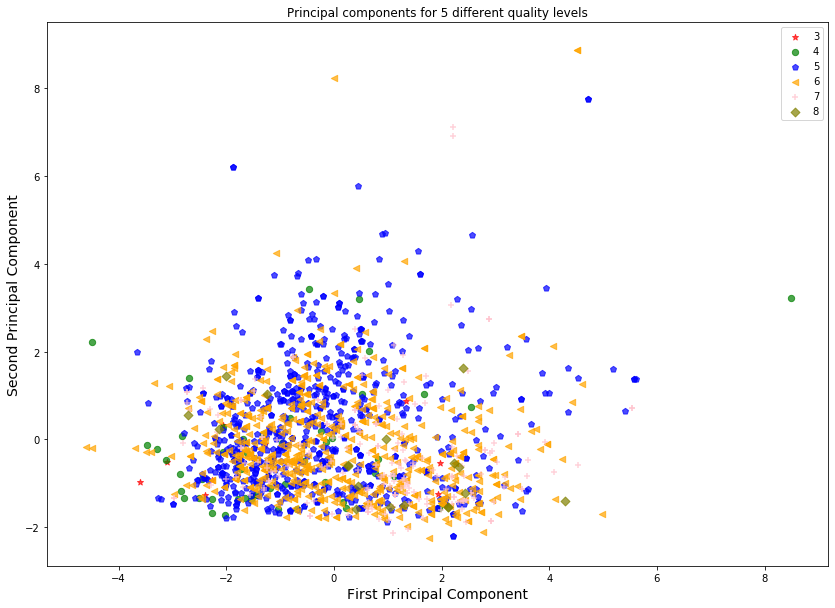

In [186]:
# Principal Components for 5 different wine quality levels
Xax=X_pca[:,0] # 1st principal component
Yax=X_pca[:,1] # 2nd principal component
labels=y # quality class
cdict={3:'red',4:'green',5:'blue',6:'orange',7:'pink',8:'olive'}
labl={3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'}
marker={3:'*',4:'o',5:"p",6:"<",7:"+",8:"D"}
alpha={3:.7, 4:.7, 5:.7, 6:.7, 7:.7, 8:.7}
fig,ax=plt.subplots(figsize=(14,10))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.title("Principal components for 5 different quality levels")
plt.legend()
plt.show()

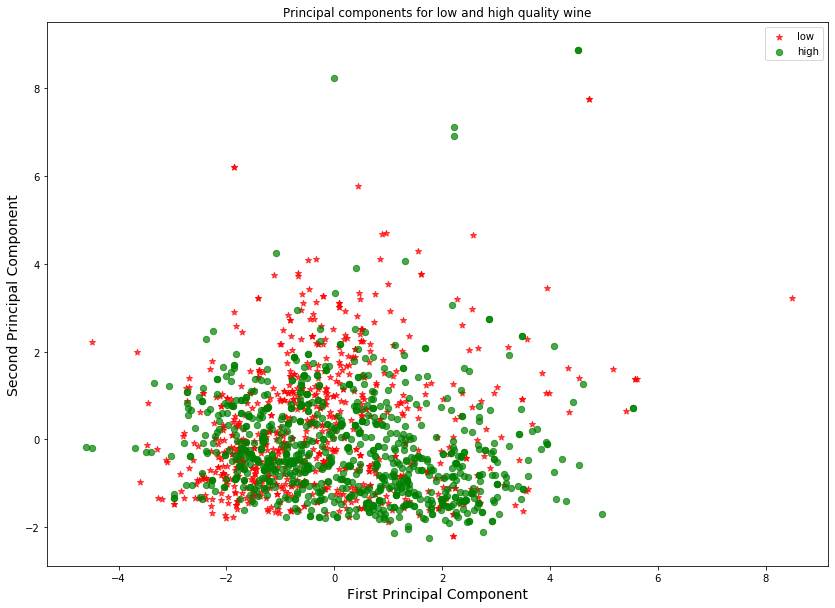

In [185]:
# Principal Components for low/high wine quality levels
Xax=X_pca[:,0] # 1st principal component
Yax=X_pca[:,1] # 2nd principal component
labels=df['quality_groups'] # quality class
cdict={1:'red',2:'green'}
labl={1:'low',2:'high'}
marker={1:'*',2:'o'}
alpha={1:.7, 2:.7}
fig,ax=plt.subplots(figsize=(14,10))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.title("Principal components for low and high quality wine")
plt.legend()
plt.show()

## K-means clustering with PCA components

1st step: Use the elbow model to determine the ideal number of clusters (measuring the sum of the sqaured differences/inertia), <br> display the visualization and when the "elbow" appears that's the optimal number of k-clusters.  <br>
2nd step: Apply k-means clustering  <br>
3rd step: Visualize the clusters with their centers <br>

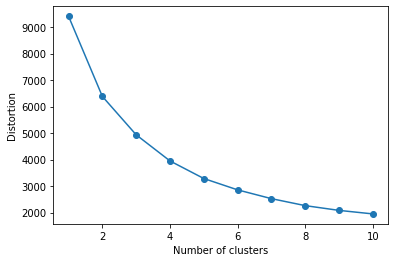

In [143]:
# Determining the ideal number of clusters for our k-means model-->
# measuring the sum of the squared distances to the nearest cluster center = inertia
# when the "elbow" appears in the graph that's the optimal number of k 

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_pca)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [189]:
from sklearn.cluster import KMeans
clusters=2
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(X_pca) # Compute k-means clustering
y_kmeans = kmeans.predict(X_pca) # Predict the closest cluster each sample in X belongs to.
centers = kmeans.cluster_centers_
centers

array([[-1.03070845,  0.20801274,  0.01019168],
       [ 1.76268615, -0.35573704, -0.0174295 ]])

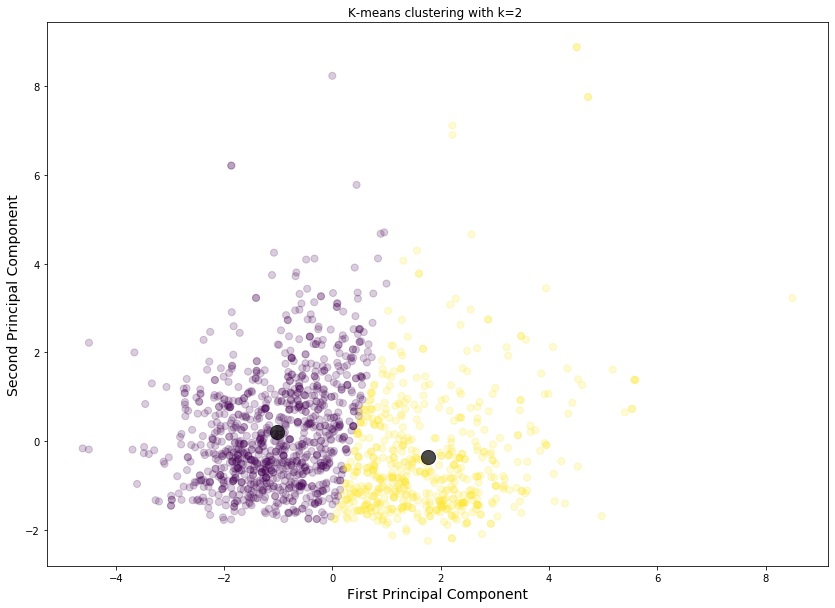

In [190]:
plt.figure(figsize=(14,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50 , alpha =.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);


plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.title('K-means clustering with k={} '.format(clusters))
plt.show()